In [1]:
# Load The preprocessed data into a dataframe
import pandas as pd

X_train = pd.read_csv("dataset/feature-engineering/X_train.csv", index_col=0)
y_train = pd.read_csv("dataset/feature-engineering/y_train.csv", index_col=0)

X_test = pd.read_csv("dataset/feature-engineering/X_test.csv", index_col=0)

In [2]:
y_train.head()

,Loan_Status
Loan_ID,
LP001002,1
LP001003,0
LP001005,1
LP001006,1
LP001008,1


In [3]:
# Apply Principal Component Analysis
from sklearn.decomposition import PCA
import seaborn as sns

N_COMPONENTS = X_train.shape[1]

pca = PCA(n_components=N_COMPONENTS)

In [4]:
# Build the training set's data frame from the resulting principal components
training_set = pd.DataFrame(
    data=pca.fit_transform(X_train),
    columns=[f"PC-{i + 1}" for i in range(N_COMPONENTS)]
).set_index(X_train.index)

# Build the testing set's data frame from the resulting principal components
testing_set = pd.DataFrame(
    data=pca.fit_transform(X_test),
    columns=[f"PC-{i + 1}" for i in range(N_COMPONENTS)]
).set_index(X_test.index)

training_set["Loan_Status"] = y_train.to_numpy()

In [5]:
training_set.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,1.841023,-0.050254,-0.398035,-0.134278,-0.805447,0.011900,-0.156415,-0.126621,-0.197218,-0.469712,1
LP001003,-0.755146,-0.412312,0.272855,-0.467618,0.927372,-0.208902,-0.338324,-0.048699,-0.113308,0.022866,0
LP001005,1.760603,0.074029,-0.320105,-0.337046,-0.790435,-0.815663,-0.208361,-0.071069,0.885642,-0.131981,1
LP001006,0.009642,-0.705032,0.910745,-0.298999,-0.971629,-0.344437,0.766788,-0.292883,-0.062571,0.148457,1
LP001008,1.006102,-0.239496,-0.686397,0.754601,-0.982966,0.086239,-0.050821,-0.156239,-0.250848,-0.439027,1


In [6]:
testing_set.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
Loan_ID,,,,,,,,,,
LP001015,-0.346865,-0.963323,0.707374,-0.775143,0.668508,-0.726427,-0.188841,0.165099,0.065964,-0.096704
LP001022,-0.285956,0.569751,-0.621162,-0.906469,0.167664,-0.266982,-0.266194,-0.008934,-0.003548,-0.088706
LP001031,-0.308489,1.723700,-0.495952,-0.492340,0.801777,-0.031761,-0.217398,-0.122636,-0.068628,-0.116833
LP001035,-0.152059,1.369224,-0.238083,-1.144340,-0.399536,-0.107822,-0.388176,-0.046000,-0.073158,-0.067785
LP001051,-0.278295,-1.328395,0.965721,-1.126641,0.003162,-0.056401,0.758444,-0.251217,-0.349608,-0.116791


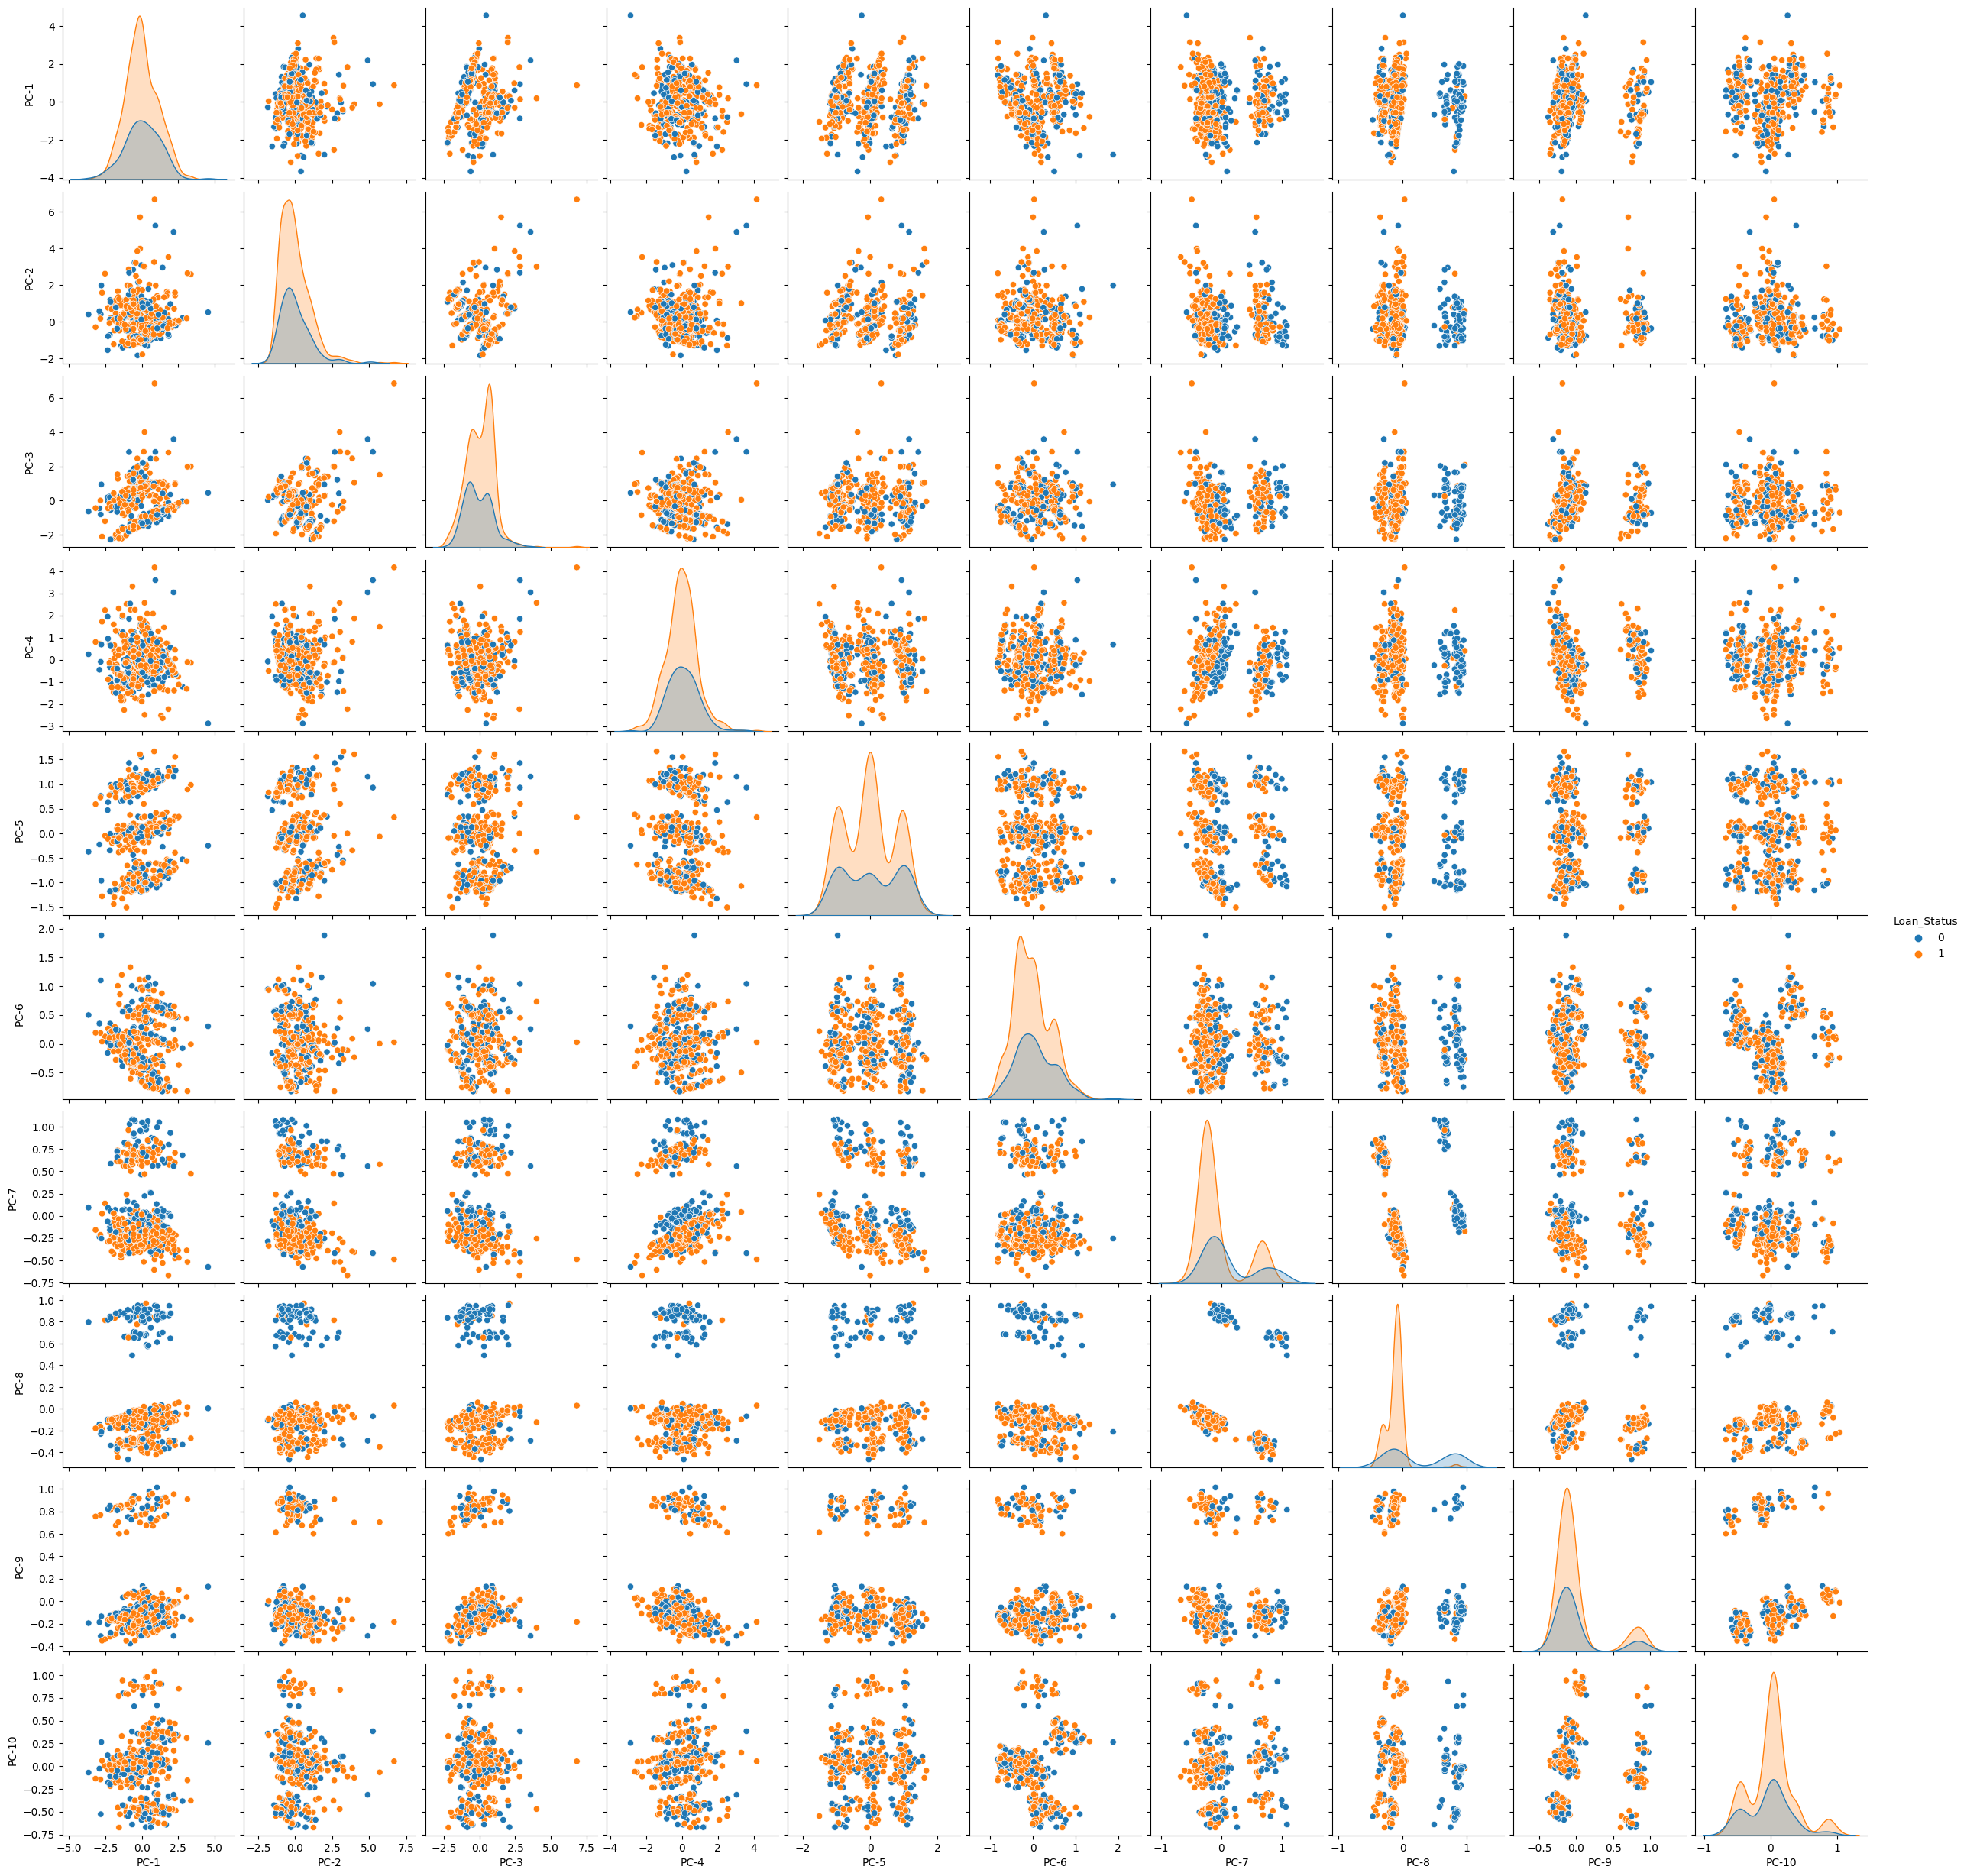

In [7]:
# Check the paired-scatter plot of each principal components
sns.pairplot(data=training_set, hue="Loan_Status")

In [9]:
# Export the PCA version of the pre-processed training set
training_set.to_csv("dataset/pca/train.csv")

# Export the PCA version of the pre-processed testing set
testing_set.to_csv("dataset/pca/test.csv")